<a href="https://colab.research.google.com/github/insh-samnani/Personal-Projects/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload CSV File from your PC/Laptop

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LiverPatientDataset.csv to LiverPatientDataset.csv
User uploaded file "LiverPatientDataset.csv" with length 23857 bytes


In [ ]:
#Importing Libraries

import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,mean_squared_error,roc_auc_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,Normalizer,MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier,BaggingRegressor,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD

In [ ]:
#Creating DataFrame

df = pd.read_csv(io.BytesIO(uploaded['LiverPatientDataset.csv']))

In [ ]:
#Viewing few records of DataFrame LiverPatientDataset

df.head(5)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Checking if our data is having any null values

df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [ ]:
#As we found only one column having four null values, we can simply drop those rows

df=df.dropna()
df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [ ]:
#Checking the number of unique values in each column

df.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        262
albumin             152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              69
is_patient            2
dtype: int64

In [ ]:
#Checking for correlations between different variables

df.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
tot_bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
direct_bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
tot_proteins,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
albumin,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
ag_ratio,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
sgpt,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
sgot,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
alkphos,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
is_patient,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


In [ ]:
#Modifying our data to make a categorical column

df["is_patient"]=df["is_patient"].replace([1,2],[1,0])

### **CLASSIFIERS**

In [ ]:
#Applying "KNeighborsClassifier" that is Supervised Machine Learning Algorithm to check the score so that if the score is good, we could make predictions from our model

X=df.drop(["is_patient","gender","sgpt","ag_ratio","age","albumin","tot_proteins"],axis=1).values
y=df["is_patient"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21,stratify=y)
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)
print("The optimum number of n_neighbors should be: " + str(knn_cv.best_params_))
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy Score/Unscaled: ")
print(score)

#As we can see that the score is 0.6551, the score is moderate but not much good to make appropriate predictions. Let us apply scaling and observe our accuracy score

param_grid={'knn__n_neighbors':np.arange(1,50)}
steps=[('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=20))]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)
knn_cv=GridSearchCV(pipeline,param_grid)
knn_cv.fit(X_train,y_train)
score=knn_cv.score(X_test,y_test)
print("Accuracy Score/Scaled: ")
print(score)

#We slightly improved our accuracy score

The optimum number of n_neighbors should be: {'n_neighbors': 20}
Accuracy Score/Unscaled: 
0.6551724137931034
Accuracy Score/Scaled: 
0.7172413793103448


Roc Curve: 


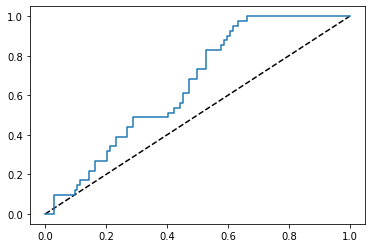

Accuracy Score: 
0.696551724137931


In [ ]:
#Applying LogisticRegression as an alternative

reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_pred_proba=reg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba,pos_label=2)
print("Roc Curve: ")
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Roc_Curve')
plt.show()
print("Accuracy Score: ")
print(reg.score(X_test,y_test))

#The score is slightly high
#The area under roc curve is less, hence we can expect an average prediction from our model through logistic regression algorithm

In [ ]:
#If you want to make a prediction that depending on some features, whether a person will be a Male or Female, then you can first transform the column of gender as:

df_gender=pd.get_dummies(df["gender"],drop_first=True)
df_gender=pd.concat([df,df_gender],axis=1)
df_gender=df_gender.drop("gender",axis=1)
df_gender.head(5)

#Now you can apply any classification model by keeping appropriate features for "X" and column of "Male" as "y"

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


### **UNSUPERVISED MACHINE LEARNING**

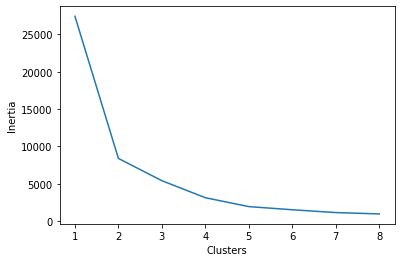

is_patient    1    2
labels              
0           306  160
1            16    0
2             1    0
3            27    0
4            59    5
5             5    0


In [ ]:
#let us apply another model that belongs to "Unsupervised Machine Learning" ; "KMeans"

X=df.drop(["is_patient","gender","sgpt","ag_ratio","age","albumin","tot_proteins"],axis=1).values
y=df["is_patient"].values
ks=range(1,9)
inertias=[]
for k in ks:
  model=KMeans(n_clusters=k)
  model.fit(X)
  inertias.append(model.inertia_)
plt.plot(ks,inertias)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()
model=KMeans(n_clusters=6)
y_pred=model.fit_predict(X)
dff=pd.DataFrame({'labels':y_pred,'is_patient':y})
ct=pd.crosstab(dff['labels'],dff['is_patient'])
print(ct)

In [ ]:
#As we observed that teh results are not desired one. We can apply preprocessing to make our results better

normalizer=StandardScaler() #Here you can apply MaxAbsScaler(), StandardScaler()
kmeans=KMeans(n_clusters=6)
pipeline=make_pipeline(normalizer,kmeans)
pipeline.fit(X)
y_pred_pipeline=pipeline.predict(X)
dff=pd.DataFrame({'labels':y_pred_pipeline,'is_patient':y})
ct=pd.crosstab(dff['labels'],dff['is_patient'])
print(ct)

#But you will observe that none of the preprocessing technique took us to the desired results, hence our dataset is not matching appropriately with unsupervised machine learning algorithm

is_patient    1   2
labels             
0            52   8
1           158  73
2            19  12
3           132  32
4            50  40
5             3   0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


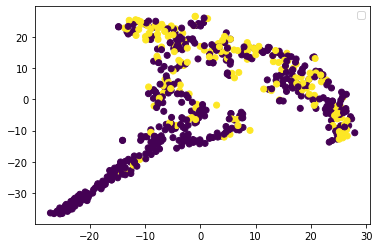

In [ ]:
#Visualizing samples by "Stochastic Neighbor Embeding" ; TSNE

model=TSNE(learning_rate=100) #Try learning_rate between 5 and 200
transformed=model.fit_transform(X)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=df['is_patient'])
plt.legend()
plt.show()

([<matplotlib.axis.XTick at 0x7f6e50acb590>,
 [Text(0, 0, 'alkphos'),
  Text(0, 0, 'tot_bilirubin'),
  Text(0, 0, 'direct_bilirubin'),
  Text(0, 0, 'sgot')])

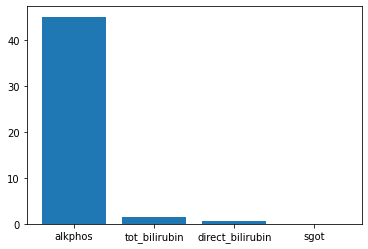

In [ ]:
#Let us see that in case of unsupervised learning, which feature is most impacting (have high variance) on target variable as according to the concept of PCA, high variance features are very informative

pca=PCA()
pca.fit(X)
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xticks(features,['alkphos','tot_bilirubin','direct_bilirubin','sgot'])

### **REGRESSORS**

In [ ]:
#Applying cross validation performance to check that how much score we can get around in our regressor algorithms by using "tot_bilirubin" feature to make predictions on direct_bilirubin

X=df[["tot_bilirubin"]].values
y=df["direct_bilirubin"].values
kf=KFold(n_splits=20,shuffle=True,random_state=88)
reg=LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=kf)
print("Mean Accuracy Score: ")
print(cv_results.mean())

0.8132809704616945


In [ ]:
#Now let us apply few regressor algorithms where "tot_bilirubin" will be the feature and we will use it to make predictions on direct_bilirubin in a person having liver disease

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Accuracy Score: ")
print(reg.score(X_test,y_test))

#Our score is quite good

0.8775370413636211


In [ ]:
#Let us apply Ridge Regression

alpha=[0.1,1.0,10.0,100.0,1000.0]
scores=[]
for alp in alpha:
  ridge=Ridge(alpha=alp)
  ridge.fit(X_train,y_train)
  y_pred=ridge.predict(X_test)
  scores.append(ridge.score(X_test,y_test))
print("Accuracy Scores: ")
print(scores) #Scores are like R-Square, its desirable value is 0.9 and above. Hence Ridge Regression is quite working

[0.877534986626447, 0.8775164935535158, 0.8773315195337812, 0.8754775568735376, 0.856612357726787]


In [ ]:
#Let us apply Lasso Regression

alpha=[0.1,1.0,10.0,100.0,1000.0]
scores=[]
for alp in alpha:
  lasso=Lasso(alpha=alp)
  lasso.fit(X_train,y_train)
  y_pred=lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))
print("Accuracy Scores: ")
print(scores) #Scores are like R-Square, its desirable value is 0.9 and above. Hence Lasso Regression is quite working

[0.8752551534813926, 0.8529177641201305, 0.45130442680825167, -4.8690879804969e-05, -4.8690879804969e-05]


### **DECISION TREE CLASSIFIERS**

Text(0, 0.5, 'Features')

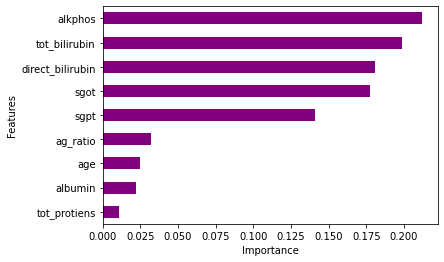

In [ ]:
#Finding out the best features that have significant impact on target variables to make our predictions more accurate for decision tree classifier algorithms

X1=df.drop(["is_patient","gender"],axis=1).values
y1=df["is_patient"].values
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=21)
rf=RandomForestClassifier(n_estimators=300,min_samples_leaf=0.12,n_jobs=-1,random_state=21)
rf.fit(X1_train,y1_train)
y_pred=rf.predict(X1_test)
importance_rf=pd.Series(rf.feature_importances_,index=['age','tot_bilirubin','direct_bilirubin','alkphos','sgpt','sgot','tot_protiens','albumin','ag_ratio'])
sorted_importance_rf=importance_rf.sort_values()
sorted_importance_rf.plot(kind='barh',color='purple')
plt.xlabel("Importance")
plt.ylabel("Features")

#Now the bar graph shows that we should use "alkphos", "tot_bilirubin", "direct_bilirubin", and "sgot" feature to predict whether a person is patient of liver disease or not

In [ ]:
#Applying Adaptive Boosting Classifier to check that if the score is quite desirable to make accurate predictions

X=df.drop(["is_patient","gender","sgpt","ag_ratio","age","albumin","tot_proteins"],axis=1).values
y=df["is_patient"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)
dtc=DecisionTreeClassifier(criterion='gini',random_state=30) #We have applied criterion="gini" to improve scaling, you can also apply "entropy" but we get better results by "gini"
adb_clf=AdaBoostClassifier(base_estimator=dtc,n_estimators=300,random_state=30)
adb_clf.fit(X_train,y_train)
y_pred_proba=adb_clf.predict_proba(X_test)[:,1]
print("Accuracy Score/Unscaled: ")
print(roc_auc_score(y_test,y_pred_proba))
print("\nAccuracy Score/Scaled: ")
steps=[('scaler',StandardScaler()),('dtc',DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=74))]
pipeline=Pipeline(steps)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=74)
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print(pipeline.score(X_test,y_test)) 

#But results decreased our acuracy. But we can see that through scaling, we achieved quite better results. You can apply scaling in any classifier algorithm to improve your accuracy score

Accuracy Score/Unscaled: 
0.6468994101705723

Accuracy Score/Scaled: 
0.6896551724137931


In [ ]:
#Applying Gradient Boosting Classifier as an alternative

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=89)
gbc=GradientBoostingClassifier(n_estimators=300,max_depth=4,random_state=89)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print("Accuracy Score: ")
print(accuracy_score(y_test,y_pred))

0.6781609195402298


In [ ]:
#Applying VotingClassifier to make our predictions more accurate by choosing the best algorithm out of 3 that are mentioned in classifiers as an alternative

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=90)
lr=LogisticRegression(random_state=90)
knn=KNeighborsClassifier(n_neighbors=30)
dtc=DecisionTreeClassifier(max_depth=4,random_state=90)
classifiers=[('Logistic Regression',lr),('K Nearest Neighbors',knn),('Decision Tree Classifier',dtc)]
vc=VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)
print("Accuracy Score: ")
print(accuracy_score(y_test,y_pred))

Accuracy Score: 
0.7126436781609196


Accuracy Score: 
0.735632183908046

Confusion Matrix: 
[[123   8]
 [ 38   5]]

Classification Report: 
              precision    recall  f1-score   support

           1       0.76      0.94      0.84       131
           2       0.38      0.12      0.18        43

    accuracy                           0.74       174
   macro avg       0.57      0.53      0.51       174
weighted avg       0.67      0.74      0.68       174

Roc Score: 
0.6626131723770636

Roc Curve: 


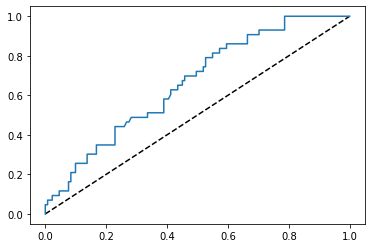

In [ ]:
#Applying BaggingClassifier to make our predictions more accurate if we can

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)
dt=DecisionTreeClassifier(max_depth=4,random_state=21)
bc=BaggingClassifier(base_estimator=dt,n_estimators=300,n_jobs=-1,random_state=21)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print("Accuracy Score: ")
print(accuracy_score(y_test,y_pred))
print("\nConfusion Matrix: ") 
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report: ") #You can check that as our model is average, we can achieve a good rate of recall and f1-score, but precision alone is having quite low rate, hence we have large number of false positive rates as compare to false negative rates
print(classification_report(y_test,y_pred))
print("Roc Score: ")
y_pred_proba=bc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_proba))
print("\nRoc Curve: ")
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba,pos_label=2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Roc_Curve')
plt.show()

#Yes, we have improved our scores
#But the model is predicting large number of people as patients although if they are not, but small number of people as not-patients although if they are. You can cross check the results from confusion matrix

### **CONCLUSIONS:** Hence you can either apply "VOTING CLASSIFIER" or "BAGGING CLASSIFIER"
To predict by using "alkphos", "tot_bilirubin", "direct_bilirubin", and "sgot" features that whether a person is patient of liver disease or not

### **DECISION TREE REGRESSORS**

In [ ]:
#Applying HyperParameterTuning to check for best pair of hyperparameters for DecisionTreeRegressor 

X=df[["tot_bilirubin"]].values
y=df["direct_bilirubin"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=67)
params_dt={'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[0.1,0.2,0.3,0.4,0.5]}
dt=DecisionTreeRegressor(random_state=67)
grid_dt=GridSearchCV(dt,params_dt,cv=10,n_jobs=-1)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)
print("Accuracy Score: ")
print(grid_dt.best_score_)

{'max_depth': 6, 'min_samples_leaf': 0.1}
0.7368323084252759


Text(0, 0.5, 'Features')

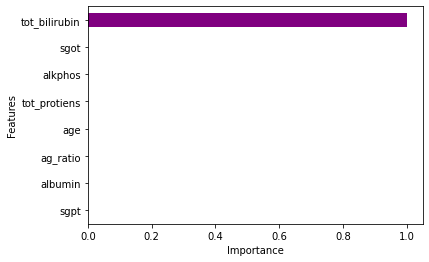

In [ ]:
#Finding out the best features that have significant impact on target variables to make our predictions more accurate (But now for applying regressor problems)

X1=df.drop(["is_patient","gender","direct_bilirubin"],axis=1).values
y1=df["direct_bilirubin"].values
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=21)
rf=RandomForestRegressor(max_depth=4,min_samples_leaf=0.1,random_state=21)
rf.fit(X1_train,y1_train)
y_pred=rf.predict(X1_test)
importance_rf=pd.Series(rf.feature_importances_,index=['age','tot_bilirubin','alkphos','sgpt','sgot','tot_protiens','albumin','ag_ratio'])
sorted_importance_rf=importance_rf.sort_values()
sorted_importance_rf.plot(kind='barh',color='purple')
plt.xlabel("Importance")
plt.ylabel("Features")

#As you can see that "tot_bilirubin" have a significant impact on our target variable "direct_bilirubin"

In [ ]:
#Decsion tree regressor model is applied on the significant features of liver damage such as Alkphos,Total Bilirubin adn Sgot

X=df[["tot_bilirubin"]].values
y=df["direct_bilirubin"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1000,test_size=0.25)
dt=DecisionTreeRegressor(max_depth=6,min_samples_leaf=0.1,random_state=1000)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy Score: ")
print(dt.score(X_test,y_test))

#The predicted score is slighlty higher so for better predictions we go to bagging regressors

Accuracy Score: 
0.8014865785362882


In [ ]:
#The regressor tree is applied but its score is quite low, its tested on the same features as of Decison tree was tested and trained

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2000,test_size=0.25)
rf=RandomForestRegressor(n_estimators=300,min_samples_leaf=0.1,n_jobs=-1,random_state=2000)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy Score: ")
print(rf.score(X_test,y_test))

0.693711074966348


In [ ]:
#Applying BaggingRegressor to make our predictions more accurately on the sample testing and training dataset and reults are quite suprisingly high

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.25)
dt=DecisionTreeRegressor(max_depth=4,random_state=11)
bc=BaggingRegressor(base_estimator=dt,n_estimators=300,n_jobs=-1,random_state=11)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
print("Accuracy Score: ")
print(bc.score(X_test,y_test))

Accuracy Score: 
0.9742549204774279


In [ ]:
#Another option is Adaptive Boosting Classifier

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=90,test_size=0.25)
dt=DecisionTreeRegressor(max_depth=4,random_state=90)
adb_clf=AdaBoostRegressor(base_estimator=dt,n_estimators=300,random_state=90)
adb_clf.fit(X_train,y_train)
y_pred=adb_clf.predict(X_test)
print("Accuracy Score: ")
print(adb_clf.score(X_test,y_test))

#But again results slightly decreased the model's acuracy

0.8842043465118596


In [ ]:
#Another option is Gradient Boosting Regressor

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78,test_size=0.25)
gbc=GradientBoostingRegressor(n_estimators=300,max_depth=4,random_state=78)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print("Accuracy Score: ")
print(gbc.score(X_test,y_test))

#Its accuracy scorr is quite matching with Bagging Regressor

0.9748903333805714


### **CONCLUSIONS:** Hence you can either apply "GRADIENT BOOSTING REGRESSOR" or "BAGGING REGRESSOR"
To predict by using "tot_bilirubin" feature that how much amount of "direct_bilirubin" will be in a person's body